# [Data Manipulation with `pandas`](https://www.datacamp.com/completed/statement-of-accomplishment/course/ca13ab1cdb8f85bdd34056c422dff6f161ed9ddd)

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/adamelliotfields/datacamp/blob/main/notebooks/courses/data_manipulation_with_pandas/notebook.ipynb)
[![Render nbviewer](https://raw.githubusercontent.com/jupyter/design/main/logos/Badges/nbviewer_badge.svg)](https://nbviewer.org/github/adamelliotfields/datacamp/blob/main/notebooks/courses/data_manipulation_with_pandas/notebook.ipynb)

**Contents**
- [Inspecting a DataFrame](#Inspecting-a-DataFrame)
- [Sorting and Subsetting](#Sorting-and-Subsetting)
- [Adding Columns](#Adding-Columns)
- [Summary Statistics](#Summary-Statistics)
- [Pivot Tables](#Pivot-Tables)
- [Indexing](#Indexing)
- [Slicing](#Slicing)
- [Visualizing DataFrames](#Visualizing-DataFrames)
- [Missing Values](#Missing-Values)
- [Creating DataFrames](#Creating-DataFrames)
- [Reading and Writing CSVs](#Reading-and-Writing-CSVs)

In [1]:
%matplotlib inline


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [3]:
pd.set_option("display.max_columns", None)
pd.set_option(
    "display.width", np.iinfo(np.int32).max  # display width must be an integer (inf is a float)
)

sales = pd.read_csv("sales.csv", index_col=0)
homelessness = pd.read_csv("homelessness.csv", index_col=0)
temperatures = pd.read_csv("temperatures.csv", index_col=0)
avocados = pd.read_csv("avocados.csv")


### Inspecting a DataFrame

In [4]:
head = homelessness.head()  # the first 5 rows
describe = homelessness.describe()  # a statistical summary of the dataset (mean, std, etc)
shape = homelessness.shape  # a tuple of (rows, columns)
columns = homelessness.columns  # a list of column names
values = homelessness.values  # a 2D-array of values
index = homelessness.index  # the index range

homelessness.info()  # prints metadata like types and null counts


<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   region          51 non-null     object 
 1   state           51 non-null     object 
 2   individuals     51 non-null     float64
 3   family_members  51 non-null     float64
 4   state_pop       51 non-null     int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 2.4+ KB


### Sorting and Subsetting

_Sorting_ allows you to rearrange the rows of a DataFrame based on the values in one or more columns. _Subsetting_ allows you to extract specific slices (groups of rows) from a DataFrame based on boolean conditions. Subsetting is also known as filtering or "boolean indexing."

When you subset a DataFrame and only provide a single column name, the result is a `Series` object, not a DataFrame. This is because a DataFrame is a collection of columns, and a `Series` is a single column.

You can think of a Series like an array. It is ordered (you can access elements by _integer location_), but it can also have a labeled index (like a dictionary).

A DataFrame is an ordered collection of Series objects. When you subset with multiple columns, you're creating a new DataFrame.

#### Masking

Masking is a special type of subsetting that uses a boolean Series to filter the rows of a DataFrame. The boolean Series is called a _mask_.

In the examples below, `ind_gt_10k` is subset using the mask `homelessness["individuals"] > 10000`. The resulting Series is the same length as the DataFrame. Each `True` value in the mask indicates that the corresponding row in the DataFrame should be included in the subset.

In [5]:
homelessness_ind = homelessness.sort_values("individuals")
homelessness_fam = homelessness.sort_values("family_members", ascending=False)
homelessness_reg_fam = homelessness.sort_values(
    ["region", "family_members"],
    ascending=[True, False],
)

individuals = homelessness["individuals"]  # a Series
state_fam = homelessness[["state", "family_members"]]  # a DataFrame
ind_state = homelessness[["individuals", "state"]]
ind_gt_10k = homelessness[homelessness["individuals"] > 10000]
mountain_reg = homelessness[homelessness["region"] == "Mountain"]

# the `&` operator is for element-wise `and` operations
fam_lt_1k = homelessness["family_members"] < 1000
pac_reg = homelessness["region"] == "Pacific"
fam_lt_1k_pac = homelessness[fam_lt_1k & pac_reg]

# use `isin` to select rows whose value is in a list
south_mid_atlantic = homelessness[homelessness["region"].isin(["South Atlantic", "Mid-Atlantic"])]
mojave_homelessness = homelessness[
    homelessness["state"].isin(["California", "Arizona", "Nevada", "Utah"])
]


### Adding Columns

You can add new columns to a DataFrame by assigning a Series to a new column name.

The length of the Series must match the length of the DataFrame. If it doesn't, you'll need to perform additional transformations to get the data into the right shape.

When you perform arithmetic operations on a Series, the operation is performed _element-wise_ on each value in the Series. For example, `homelessness["individuals"] + homelessness[family_members]` returns a new Series where each value is the sum of the corresponding values in the two Series.

In [6]:
homelessness["total"] = homelessness["individuals"] + homelessness["family_members"]
homelessness["p_individuals"] = homelessness["individuals"] / homelessness["total"]
homelessness["indiv_per_10k"] = (homelessness["individuals"] * 10000) / homelessness["state_pop"]

high_homelessness = homelessness[homelessness["indiv_per_10k"] > 20]
high_homelessness_srt = high_homelessness.sort_values("indiv_per_10k", ascending=False)


### Summary Statistics

_Summary statistics_ is a field of statistics that involves computing descriptive statistics on a dataset. Descriptive statistics are statistics that describe the data, such as Measures of Center (mean, median, mode) and Measures of Spread (standard deviation, variance, range). It is covered in more detail in the "Introduction to Statistics" course.

In [7]:
# interquartile range
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)


weekly_sales = sales["weekly_sales"]
weekly_sales_mean = weekly_sales.mean()
weekly_sales_median = weekly_sales.median()

sales_date = sales["date"]
sales_date_max = sales_date.max()
sales_date_min = sales_date.min()

sales_temperature_c_iqr = sales["temperature_c"].agg(iqr)
sales_temperature_c_iqr_med = sales["temperature_c"].agg([iqr, "median"])  # same as `np.median`

sales_1_1 = sales[(sales["store"] == 1) & (sales["department"] == 1)]  # parens are required
sales_1_1 = sales_1_1.sort_values("date")
sales_1_1["cum_weekly_sales"] = sales_1_1["weekly_sales"].cumsum()
sales_1_1["cum_max_sales"] = sales_1_1["weekly_sales"].cummax()

store_types = sales.drop_duplicates(["store", "type"])
store_depts = sales.drop_duplicates(["store", "department"])
holiday_dates = sales[sales["is_holiday"] == True].drop_duplicates("date")
store_counts = store_types["type"].value_counts()
store_props = store_types["type"].value_counts(normalize=True)
dept_counts_sorted = store_depts["department"].value_counts(sort=True)
dept_props_sorted = store_depts["department"].value_counts(sort=True, normalize=True)


#### Grouped Summary Statistics

The above examples calculate summary statistics on entire columns. You can also gain insights from summary statistics on groups within a dataset.

The `groupby` method allows you to group a DataFrame by one or more columns. You can then calculate summary statistics for each group separately using aggregate functions.

In [8]:
sales_all = sales["weekly_sales"].sum()
sales_A = sales[sales["type"] == "A"]["weekly_sales"].sum()
sales_B = sales[sales["type"] == "B"]["weekly_sales"].sum()
sales_C = sales[sales["type"] == "C"]["weekly_sales"].sum()
# sales_propn_by_type = [sales_A, sales_B, sales_C] / sales_all

sales_by_type = sales.groupby("type")["weekly_sales"].sum()
sales_by_type_is_holiday = sales.groupby(["type", "is_holiday"])["weekly_sales"].sum()
sales_propn_by_type = sales_by_type / sales_by_type.sum()

sales_stats = sales.groupby("type")["weekly_sales"].agg(["min", "max", "mean", "median"])
unemp_fuel_stats = sales.groupby("type")[["unemployment", "fuel_price_usd_per_l"]].agg(
    ["min", "max", "mean", "median"]
)


### Pivot Tables

A _pivot table_ rearranges ("pivots") a DataFrame by transposing column values to rows (or vice versa) and applying aggregate functions to summarize the data.

Pivoting allows you to pivot on two dimensions (columns and rows), whereas grouping allows you to group based on one dimension (columns only).

In [9]:
mean_sales_by_type = sales.pivot_table(
    values="weekly_sales", index="type"  # default aggfunc is mean
)
mean_med_sales_by_type = sales.pivot_table(
    values="weekly_sales", index="type", aggfunc=["mean", "median"]
)
mean_sales_by_type_holiday = sales.pivot_table(
    values="weekly_sales", index="type", columns="is_holiday"
)
mean_sales_by_dept_type = sales.pivot_table(
    values="weekly_sales",
    index="type",
    columns="department",
    fill_value=0,
    margins=True,  # margins=True adds an `All` row and column which are the means of the rows and columns in the pivot table
)


### Indexing

_Indexing_ allows you to set one or more columns as an index for a DataFrame. This allows you to access rows by their values (like a dictionary) or by their integer location (like an array). You can even select multiple indexes at once.

For example, when you load a CSV in Pandas, the `index_col` argument lets you specify a column to use as the index. You can also set an index after creating a DataFrame using the `set_index` method.

Like in a relational database, indexing in Pandas enables more intuitive querying and filtering operations.

In [10]:
temperatures_city_ind = temperatures.set_index("city")
# temperatures_ind.reset_index()
# temperatures_ind.reset_index(drop=True)

cities = ["Moscow", "Saint Petersburg"]
temp_cities = temperatures[temperatures["city"].isin(cities)]
temp_ind_cities = temperatures_city_ind.loc[cities]

# index by country and city
temperatures_country_city_ind = temperatures.set_index(["country", "city"])

# pass a list of tuples to `loc` to select rows with those index values
rows_to_keep = [("Brazil", "Rio De Janeiro"), ("Pakistan", "Lahore")]
temp_rows_to_keep = temperatures_country_city_ind.loc[rows_to_keep]

# sort by the index values at the city level
temp_ind_srt = temperatures_country_city_ind.sort_index(level=["city"], ascending=[True])

# sort by country then descending city
temp_ind_srt = temperatures_country_city_ind.sort_index(
    level=["country", "city"], ascending=[True, False]
)


### Slicing

_Slicing_ allows you to select consecutive rows ("slices") from a DataFrame. The main methods for slicing in Pandas are `loc` and `iloc` (integer location).

The `loc` method is used for label-based indexing. For example, `temperatures_ind` is indexed on the `date` column. Passing `"2010":"2011"` to `loc` would return all rows with a date between 01-01-2010 and 12-31-2011. You can also slice columns by providing the 2nd argument to `loc`. If you want all rows but only a slice of columns, then pass an empty slice (`:`) as the first argument.

The `iloc` method works similarly, except you use integer location to specify rows and columns instead of labels.

In [11]:
temperatures_srt = temperatures_country_city_ind.sort_index()

# subset from Pakistan to Russia
temp_pak_rus = temperatures_srt.loc["Pakistan":"Russia"]

# subset from Lahore to Moscow
temp_lah_mos = temperatures_srt.loc["Lahore":"Moscow"]

# subset from Pakistan, Lahore to Russia, Moscow
temp_pak_lah_rus_mos = temperatures_srt.loc[("Pakistan", "Lahore"):("Russia", "Moscow")]

# subset rows from India, Hyderabad to Iraq, Baghdad
temp_ind_irq = temperatures_srt.loc[("India", "Hyderabad"):("Iraq", "Baghdad")]

# subset columns from date to avg_temp_c
temp_date_avg = temperatures_srt.loc[:, "date":"avg_temp_c"]

# slice both rows and columns at once
temp_ind_irq_date_avg = temperatures_srt.loc[
    ("India", "Hyderabad"):("Iraq", "Baghdad"),
    "date":"avg_temp_c",
]

# subset temperatures for rows in 2010 and 2011
temperatures_bool = temperatures[temperatures["date"].between("2010-01-01", "2011-12-31")]
temperatures_ind = temperatures.set_index("date").sort_index()
temperatures_2010_2011 = temperatures_ind.loc["2010":"2011"]
temperatures_aug_2010_feb_2011 = temperatures_ind.loc["2010-08":"2011-02"]

# get the 23rd row, 2nd column (index starts at 0)
row_23_2 = temperatures.iloc[22, 1]

# use slicing to get the first 5 rows
rows_1_to_5 = temperatures.iloc[0:5, :]

# use slicing to get columns 3 to 4
cols_3_to_4 = temperatures.iloc[:, 2:4]

# slice both directions at once to get the first 5 rows and columns 3 to 4
rows_1_to_5_cols_3_to_4 = temperatures.iloc[0:5, 2:4]

# add a `year` column to temperatures from the year component of the `date` column
temperatures["date"] = pd.to_datetime(temperatures["date"])
temperatures["year"] = temperatures["date"].dt.year

# pivot the `avg_temp_c` column, with `country` and `city` as rows, and `year` as columns
temp_by_country_city_vs_year = temperatures.pivot_table(
    values="avg_temp_c",
    index=["country", "city"],
    columns="year",
)

# subset `temp_by_country_city_vs_year` for Egypt to India
temp_egy_ind = temp_by_country_city_vs_year.loc["Egypt":"India"]

# subset for Egypt, Cairo to India, Delhi
temp_egy_cai_ind_del = temp_by_country_city_vs_year.loc[("Egypt", "Cairo"):("India", "Delhi")]

# subset for Egypy, Cairo to India, Delhi from 2005 to 2010
temp_egy_ind_2005_2010 = temp_by_country_city_vs_year.loc[
    ("Egypt", "Cairo"):("India", "Delhi"),
    2005:2010,
]

# get the worldwide mean temp by year
mean_temp_by_year = temp_by_country_city_vs_year.mean(axis="index")

# filter for the year that had the highest mean temp
max_mean_temp = mean_temp_by_year[mean_temp_by_year == mean_temp_by_year.max()]

# get the mean temp by city
mean_temp_by_city = temp_by_country_city_vs_year.mean(axis="columns")

# filter for the city that had the lowest mean temp
min_mean_temp = mean_temp_by_city[mean_temp_by_city == mean_temp_by_city.min()]


### Visualizing DataFrames

Pandas has built-in visualization capabilities that are powered by Matplotlib.

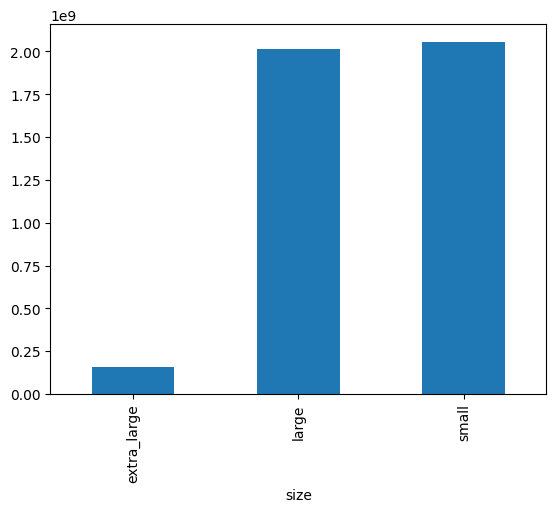

In [12]:
# calculate the total avocados sold for each size group
nb_sold_by_size = avocados.groupby("size")["nb_sold"].sum()

# create a bar plot of the number of avocados sold by size
nb_sold_by_size.plot(kind="bar")
plt.show()


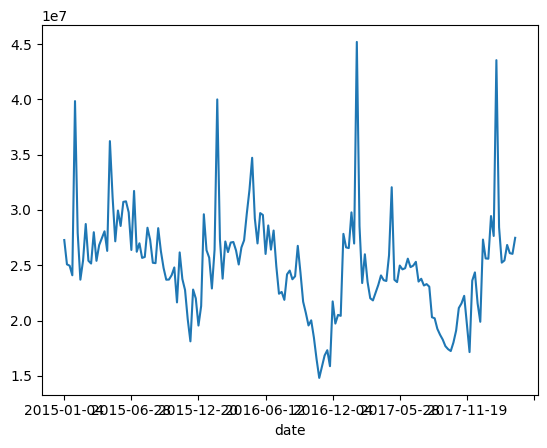

In [13]:
# get the total number of avocados sold on each date
nb_sold_by_date = avocados.groupby("date")["nb_sold"].sum()

# create a line plot of the number of avocados sold by date
nb_sold_by_date.plot(kind="line")
plt.show()


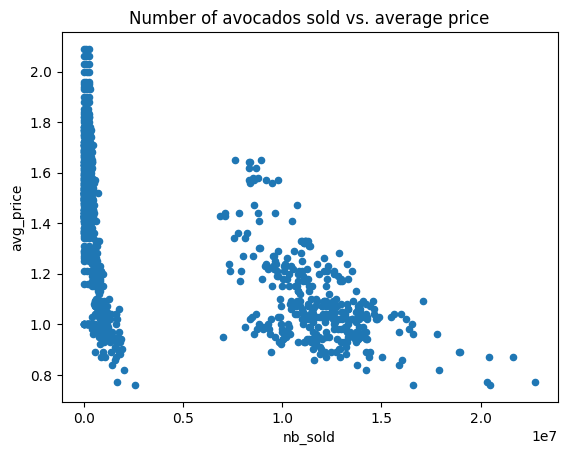

In [14]:
# scatter plot of avg_price vs nb_sold with title "Number of avocados sold vs. average price"
avocados.plot(
    x="nb_sold",
    y="avg_price",
    kind="scatter",
    title="Number of avocados sold vs. average price",
)
plt.show()


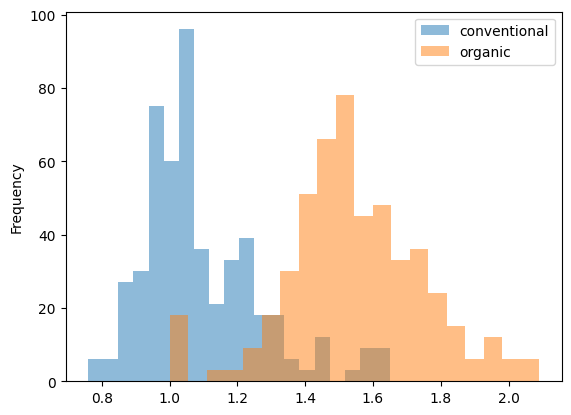

In [15]:
# histogram of conventional avg_price
avocados[avocados["type"] == "conventional"]["avg_price"].plot(
    kind="hist",
    alpha=0.5,
    bins=20,
)

# histogram of organic avg_price
avocados[avocados["type"] == "organic"]["avg_price"].plot(
    kind="hist",
    alpha=0.5,
    bins=20,
)

# add a legend with "conventional" and "organic"
plt.legend(["conventional", "organic"])
plt.show()


### Missing Values

Missing values are values that are not present in the dataset. When you ingest a CSV using Pandas, missing values are automatically filled with `NaN` by default.

You can detect missing values using the `isna()` method, which returns a boolean DataFrame indicating whether each value is missing or not. You can then use `any()` to determine whether any columns have missing values, or `sum()` to determine how many values are missing in each column.

You can drop rows with missing values using the `dropna()` method. You can also fill missing values with a specified value using the `fillna()` method.

In [16]:
avocados_2016 = avocados[avocados["year"] == 2016]

avocados_missing = avocados_2016.isna().any()
avocados_missing_sum = avocados_2016.isna().sum()
avocados_complete = avocados_2016.dropna()
avocados_filled = avocados_2016.fillna(0)


### Creating DataFrames

In [17]:
avocados_list = [
    {"date": "2019-11-03", "small_sold": 10376832, "large_sold": 7835071},
    {"date": "2019-11-10", "small_sold": 10717154, "large_sold": 8561348},
]
df_avocados_list = pd.DataFrame(avocados_list)

avocados_dict = {
    "date": ["2019-11-17", "2019-12-01"],
    "small_sold": [10859987, 9291631],
    "large_sold": [7674135, 6238096],
}
df_avocados_dict = pd.DataFrame(avocados_dict)


### Reading and Writing CSVs

In [18]:
airline_bumping = pd.read_csv("airline_bumping.csv")
airline_totals = airline_bumping.groupby("airline")[["nb_bumped", "total_passengers"]].sum()
airline_totals["bumps_per_10k"] = (
    airline_totals["nb_bumped"] / airline_totals["total_passengers"]
) * 10000
airline_totals_sorted = airline_totals.sort_values("bumps_per_10k", ascending=False)

# write to a CSV by simply passing the filename (or a buffer)
# airline_totals_sorted.to_csv("airline_totals_sorted.csv", index=False)

# you can get the CSV data as a string without passing `path_or_buf`
airline_bumping_csv = airline_bumping.to_csv(index=False)
print(airline_bumping_csv)


airline,year,nb_bumped,total_passengers
DELTA AIR LINES,2017,679,99796155
VIRGIN AMERICA,2017,165,6090029
JETBLUE AIRWAYS,2017,1475,27255038
UNITED AIRLINES,2017,2067,70030765
HAWAIIAN AIRLINES,2017,92,8422734
EXPRESSJET AIRLINES,2017,785,11738812
SKYWEST AIRLINES,2017,917,24516354
AMERICAN AIRLINES,2017,4517,98017132
ALASKA AIRLINES,2017,658,18817924
SOUTHWEST AIRLINES,2017,6678,115988988
FRONTIER AIRLINES,2017,540,12059943
SPIRIT AIRLINES,2017,1502,17069647
DELTA AIR LINES,2016,912,97237060
VIRGIN AMERICA,2016,77,5927938
JETBLUE AIRWAYS,2016,2140,25990828
UNITED AIRLINES,2016,2874,64438132
HAWAIIAN AIRLINES,2016,30,8154838
EXPRESSJET AIRLINES,2016,2541,16119866
SKYWEST AIRLINES,2016,2177,22575383
AMERICAN AIRLINES,2016,6598,99348093
ALASKA AIRLINES,2016,734,17725197
SOUTHWEST AIRLINES,2016,11907,112153048
FRONTIER AIRLINES,2016,688,10895052
SPIRIT AIRLINES,2016,1418,15234924

